# BUS 32100, Week 4
# In-class exercise: data wrangling with `Pandas` using MTA data

Learning objectives:

* Practice combining datasets into a single dataframe
* Understand basic methods for data quality checking and cleaning 
* Use visualization as an aid in exploring data quality
* Practice working with timeseries data and plotting timeseries data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

## Download the data and import into `Pandas`

For this week's exercise, you must download the data yourself from the source! You will need to download multiple files and append them together into a single DataFrame. 

* Turnstile data for the NYC subway is available here: http://web.mta.info/developers/turnstile.html
* Each file contains one week of data. You should download **at least three files of data** (though you can download more). A good starting point is to download these three files: 
    * http://web.mta.info/developers/data/nyct/turnstile/turnstile_160903.txt
    * http://web.mta.info/developers/data/nyct/turnstile/turnstile_160910.txt
    * http://web.mta.info/developers/data/nyct/turnstile/turnstile_160917.txt

## Data dictionary

[Refer to the data dictionary for definitions of each column.](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt)

## Two options for downloading the data

1. Copy/paste the URLs above into a browser and save each as a txt file. Import each txt file separately into Pandas. Use what we learned about concatenating files to append the three files into one `DataFrame`.
2. The more advanced approach would be to download multiple files using Python/Pandas at one time, without saving each txt to your local computer. Hint: Notice that the URLs are similar, except for the date. The URL is "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt", where the {} changes for each file's date.

**If you want to try option #2 but need some hints to start, see below.**

## Optional: hints for automating the download of multiple files

1. Create a list of dates (e.g. 160903, 160910, etc). You can either make the list manually or somehow automate that, too. 
2. Write a for-loop over the list of dates that takes the general URL and fills in the {} with each date for each iteration (look into [Python `f strings`](https://realpython.com/python-f-strings/) to help with filling in the {} in the string).
3. Find out how to pass a URL to Pandas instead of a local csv to get back a DataFrame.
4. How can you keep track of all the DF's you're creating? Can you put them in some sort of container until you're ready to concatenate them all?
5. After you've looped over all the dates you want to use, your DF's should be in some container. What method takes a container (e.g. list) of DFs and returns them all concatenated to each other?

## Your tasks tonight: 

1. Check the column names of the data: Do they seem correct? How can you print just the column names of a df? If you notice an error in a column name, how can you correct it? Look into the `strip()` method if needed. 

2. We'll eventually want to plot a time series of turnstile entries/exits. What do we need to do to the data to make a timeseries? Is there a way to tell Pandas that a particular column has datatime data as you're importing it, so you don't need to cast it later? Look into this! But casting the column after you import the file is ok, too.

3. There may be some errors in the data. For example, there are some timestamps that are audited/updated. Can you use the data dictionary, combined with EDA, to figure out where these rows are? Do you need to use the entire datetime for this step, or will you need to drop a portion of it? For example, do you need to use the minutes/seconds, or can you drop that from the datetime? You can't delete minutes/seconds from a datetime, but you can set them to zero without changing the day/month/year. Look into it. 

3. Look into the `DESc` column: what does it represent? How does this look in the data? Do you need to remove any data to account for what this column is doing?

4. What is the `entries` column actually counting? Is `entires` the number of people going through a turnstile every hour? How can we change this data to get the number of entries at a given time? This one is **tricky**! Look into `shift` and `apply` and see if you can figure out how to move a number from the next/previous day to be on the same row as today. That is, how can I get yesteday's `entries` on the same row as today so I can subtract them to get the number of people who went through the turnstile today? 

4. It seems like we're counting cumulative entries. But is the counter always working correctly? Does it ever go wrong? Does it ever run backwards, perhaps? 

5. Use some plots to quality check the data. Some suggestions: histogram of daily entries/exits; bar chart of the top 10 stations; box and whisker plot of entries per station to find outliers; whatever else you can think of! If you have an idea of what to make but don't know how to do it in Python, ask us :)

In [5]:
# Import necessary libraries
import pandas as pd
from datetime import datetime, timedelta

# Base URL where the data lives - notice we use {} as a placeholder for the date
base_url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"

# Convert starting date string to datetime object for easier manipulation
# We're starting with September 3, 2016
start = datetime.strptime('160903', '%y%m%d')

# Create empty list to store the dates we want to download
dates = []

# Loop through the number of weeks we want (3 in this case)
# For each iteration, add 7 days to get the next week's date
for i in range(3):
    current_date = start + timedelta(days=i*7)
    # Convert date back to string format YYMMDD
    formatted_date = current_date.strftime('%y%m%d')
    dates.append(formatted_date)

# Create empty list to store our DataFrames
dfs = []

# Loop through our dates, download each file, and store in our list
for date in dates:
    # Create the full URL for this specific date
    url = base_url.format(date)
    print(f"Downloading data for {date}...")
    
    # Read the CSV directly from the URL
    df = pd.read_csv(url)
    
    # Add a column to track which file this data came from
    df['file_date'] = date
    
    # Add this DataFrame to our list
    dfs.append(df)

# Combine all our DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

# Check our work
print(f"\nTotal rows in combined data: {len(combined_df)}")
print("\nFirst few rows:")
print(combined_df.head())


Total rows in combined data: 580895

First few rows:
    C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
0  A002  R051  02-00-00   59 ST   NQR456      BMT  08/27/2016  00:00:00   
1  A002  R051  02-00-00   59 ST   NQR456      BMT  08/27/2016  04:00:00   
2  A002  R051  02-00-00   59 ST   NQR456      BMT  08/27/2016  08:00:00   
3  A002  R051  02-00-00   59 ST   NQR456      BMT  08/27/2016  12:00:00   
4  A002  R051  02-00-00   59 ST   NQR456      BMT  08/27/2016  16:00:00   

      DESC  ENTRIES  \
0  REGULAR  5799442   
1  REGULAR  5799463   
2  REGULAR  5799492   
3  REGULAR  5799610   
4  REGULAR  5799833   

   EXITS                                                                 \
0                                            1966041                      
1                                            1966044                      
2                                            1966079                      
3                                            1966155    

Original column names:
['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS', 'file_date', 'datetime', 'datetime_rounded']

Cleaned column names:
['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS', 'file_date', 'datetime', 'datetime_rounded']

Unique times in the data:
['00:00:00' '04:00:00' '08:00:00' ... '12:41:15' '12:42:39' '11:57:55']

Unique values in DESC column:
['REGULAR' 'RECOVR AUD']


/tmp/ipykernel_204/3466761684.py:35: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['datetime_rounded'] = df['datetime'].dt.floor('H')


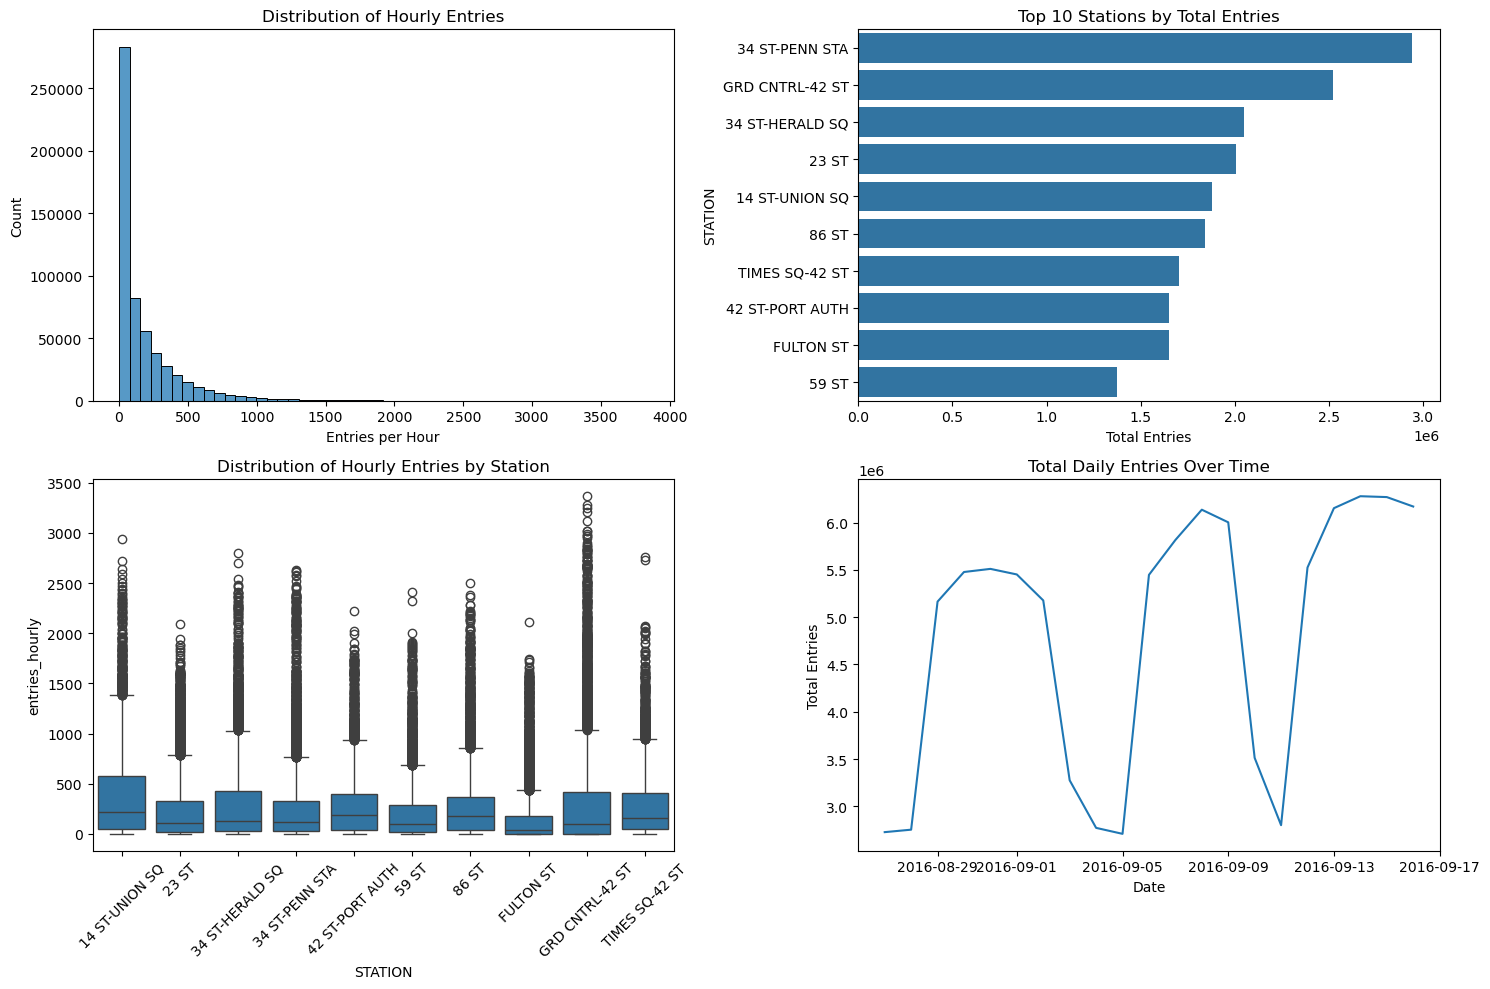


Data Summary:
Total number of stations: 374
Date range: 2016-08-27 00:00:00 to 2016-09-16 23:00:00
Percentage of suspicious entries: 0.72%
Average hourly entries per station: 177.30

Top 5 stations by total entries:
STATION
34 ST-PENN STA     2939349.0
GRD CNTRL-42 ST    2522685.0
34 ST-HERALD SQ    2046728.0
23 ST              2006928.0
14 ST-UNION SQ     1880499.0
Name: entries_hourly, dtype: float64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Assuming we already have our combined DataFrame from previous code
# Let's examine and clean the data

def analyze_mta_data(df):
    """
    Analyze and clean MTA turnstile data
    """
    # 1. Check column names
    print("Original column names:")
    print(df.columns.tolist())
    
    # Strip whitespace from column names
    df.columns = df.columns.str.strip()
    print("\nCleaned column names:")
    print(df.columns.tolist())
    
    # 2. Convert to datetime
    # Method 1: During import (commented out as we already have the DataFrame)
    # df = pd.read_csv(url, parse_dates=[['DATE', 'TIME']])
    
    # Method 2: Convert after import
    df['datetime'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'])
    
    # 3. Check for audited/updated timestamps
    # First, let's look at unique times
    print("\nUnique times in the data:")
    print(df['TIME'].unique())
    
    # Round timestamps to nearest hour (remove minutes/seconds)
    df['datetime_rounded'] = df['datetime'].dt.floor('H')
    
    # 4. Examine DESC column
    print("\nUnique values in DESC column:")
    print(df['DESC'].unique())
    
    # Filter out RECOVR AUD records
    df_clean = df[df['DESC'].str.contains('RECOVR AUD') == False]
    
    # 5. Calculate actual entries per period
    # Sort by station and time
    df_clean = df_clean.sort_values(['STATION', 'UNIT', 'SCP', 'datetime_rounded'])
    
    # Calculate entries/exits per period using shift
    df_clean['entries_hourly'] = df_clean.groupby(['STATION', 'UNIT', 'SCP'])['ENTRIES'].diff()
    df_clean['exits_hourly'] = df_clean.groupby(['STATION', 'UNIT', 'SCP'])['EXITS'].diff()
    
    # 6. Check for counter errors
    # Flag negative values or unreasonably large values (e.g., > 5000 per hour)
    df_clean['suspicious_entries'] = (df_clean['entries_hourly'] < 0) | (df_clean['entries_hourly'] > 5000)
    df_clean['suspicious_exits'] = (df_clean['exits_hourly'] < 0) | (df_clean['exits_hourly'] > 5000)
    
    # Replace suspicious values with NaN
    df_clean.loc[df_clean['suspicious_entries'], 'entries_hourly'] = pd.NA
    df_clean.loc[df_clean['suspicious_exits'], 'exits_hourly'] = pd.NA
    
    # 7. Create visualization for quality checking
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Distribution of hourly entries
    plt.subplot(2, 2, 1)
    sns.histplot(data=df_clean, x='entries_hourly', bins=50)
    plt.title('Distribution of Hourly Entries')
    plt.xlabel('Entries per Hour')
    
    # Plot 2: Top 10 stations by total entries
    plt.subplot(2, 2, 2)
    station_entries = df_clean.groupby('STATION')['entries_hourly'].sum().sort_values(ascending=False)
    top_10_stations = station_entries.head(10)
    sns.barplot(x=top_10_stations.values, y=top_10_stations.index)
    plt.title('Top 10 Stations by Total Entries')
    plt.xlabel('Total Entries')
    
    # Plot 3: Box plot of entries by station (top 10)
    plt.subplot(2, 2, 3)
    top_10_stations_data = df_clean[df_clean['STATION'].isin(top_10_stations.index)]
    sns.boxplot(data=top_10_stations_data, x='STATION', y='entries_hourly')
    plt.xticks(rotation=45)
    plt.title('Distribution of Hourly Entries by Station')
    
    # Plot 4: Time series of total daily entries
    plt.subplot(2, 2, 4)
    daily_entries = df_clean.groupby(df_clean['datetime_rounded'].dt.date)['entries_hourly'].sum()
    daily_entries.plot()
    plt.title('Total Daily Entries Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Entries')
    
    plt.tight_layout()
    plt.show()
    
    return df_clean

# Analysis summary
def print_data_summary(df_clean):
    print("\nData Summary:")
    print(f"Total number of stations: {df_clean['STATION'].nunique()}")
    print(f"Date range: {df_clean['datetime_rounded'].min()} to {df_clean['datetime_rounded'].max()}")
    print(f"Percentage of suspicious entries: {(df_clean['suspicious_entries'].mean() * 100):.2f}%")
    print(f"Average hourly entries per station: {df_clean['entries_hourly'].mean():.2f}")
    print("\nTop 5 stations by total entries:")
    print(df_clean.groupby('STATION')['entries_hourly'].sum().sort_values(ascending=False).head())


df_clean = analyze_mta_data(combined_df)
print_data_summary(df_clean)